In [1]:
my_path="datasets/"

# Load dataset from Hugging Face 🤗

In [3]:
from datasets import load_dataset

# !pip install datasets -q

# Load the dataset
dataset = load_dataset("DIBT/10k_prompts_ranked")

docs = dataset['train']['prompt']

##get a summary of dataset
dataset

DatasetDict({
    train: Dataset({
        features: ['prompt', 'quality', 'metadata', 'avg_rating', 'num_responses', 'agreement_ratio', 'raw_responses', 'kind', 'cluster_description', 'topic'],
        num_rows: 10331
    })
})

In [5]:
import random
print(f'number of prompts in dataset: {len(docs)}\n')
r=random.randint(0, len(docs)-1)
print(f'A random entry:\n {docs[r]}')

number of prompts in dataset: 10331

A random entry:
 What are some practical tips for reducing plastic waste in households, offices, and public spaces?


# Train Top2Vec model. Also save and load.

If you have arleady trained a model and saved it, then you can load it with the following prompt and skip the training.

❌
 **Of course the first time through you should skip the next command!**

In [ ]:
# Load model
import pickle

#!pip install top2vec -q

with open(my_path+'prompt_deep_model.pkl', 'rb') as f:
    model = pickle.load(f)

The next cell is the work horse, where the model is trained. ⛽: ⏰ It might take some time, so be patient.

In [6]:
##If model is already trained and saved (see section below) then this can be skipped!!
from top2vec import Top2Vec

# Assuming 'docs' is a list of text documents you wish to model
model = Top2Vec(docs, embedding_model='doc2vec', speed='deep-learn')
#fast-learn, learn, deep-learn


2024-03-28 02:44:57,294 - top2vec - INFO - Pre-processing documents for training
2024-03-28 02:44:58,012 - top2vec - INFO - Creating joint document/word embedding
2024-03-28 02:47:51,656 - top2vec - INFO - Creating lower dimension embedding of documents
2024-03-28 02:48:03,896 - top2vec - INFO - Finding dense areas of documents
2024-03-28 02:48:04,194 - top2vec - INFO - Finding topics


After waiting for the model to be trained, you might consider saving it so that next time you don't have to retrain if you come back to this later! 👍 This is what the next cell does.

In [7]:
import pickle

# Save model
with open(my_path+'prompt_deep_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# Proceed with topic analysis after retrieving model

In [8]:
model.get_num_topics()

129

In [11]:
model.get_topic_sizes()

(array([524, 276, 191, 163, 152, 141, 133, 126, 124, 121, 121, 119, 114,
        107, 104, 103, 100,  99,  98,  96,  95,  95,  93,  92,  92,  90,
         89,  89,  88,  86,  83,  83,  82,  82,  82,  81,  81,  81,  81,
         81,  81,  80,  80,  80,  80,  80,  79,  79,  79,  78,  78,  77,
         77,  76,  76,  76,  74,  74,  74,  74,  73,  73,  73,  72,  72,
         71,  71,  71,  70,  70,  70,  69,  69,  69,  69,  68,  68,  67,
         67,  67,  67,  66,  65,  65,  65,  65,  64,  64,  64,  64,  63,
         63,  63,  63,  63,  62,  62,  62,  61,  60,  59,  59,  57,  56,
         56,  55,  54,  52,  51,  50,  50,  49,  48,  48,  47,  47,  47,
         47,  46,  46,  44,  44,  44,  43,  43,  38,  31,  31,  29],
       dtype=int64),
 array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  

**Question: What do the integers in the first array mean**: ⭕

---



Your Answer:

The number of documents most similar to each topic.





In [12]:
model.topic_words[0:3]

array([['snippet', 'task', 'method', 'returns', 'code', 'function',
        'signature', 'takes', 'implement', 'string', 'dictionary',
        'dict', 'directory', 'defined', 'arguments', 'strings', 'assume',
        'specifications', 'str', 'parameter', 'missing', 'boolean',
        'indicating', 'parameters', 'represents', 'implements',
        'instance', 'object', 'otherwise', 'output', 'implementation',
        'variable', 'checks', 'struct', 'defines', 'specified', 'class',
        'note', 'input', 'imported', 'valid', 'error', 'nil',
        'constructor', 'attribute', 'pointer', 'called', 'complete',
        'assigned', 'args'],
       ['impact', 'implications', 'potential', 'analysis', 'economic',
        'environmental', 'factors', 'ethical', 'examine', 'climate',
        'research', 'findings', 'additionally', 'effectiveness',
        'cultural', 'policy', 'individuals', 'consider', 'effects',
        'provide', 'sources', 'explore', 'opportunities', 'influence',
        'su

# Documents similar to keywords

##Pick some keywords that look interesting in the top 3-4 topics:

*   model.topic_words[0]
*   model.topic_words[1]
*   model.topic_words[2]
*   etc.

In [32]:
# Assuming 'model' is your trained Top2Vec model and 'keywords' is a list of keywords.
keywords = ["method","strategies","tips","code"]
documents, document_score, document_ids = model.search_documents_by_keywords(keywords=keywords, num_docs=5)

# This will return the top most similar documents to the provided keywords,
# their similarity scores, and their IDs within the model.


In [33]:
# Print the results
for i in range(len(documents)):
    print(f"Document ID: {document_ids[i]}")
    print(f"Similarity Score: {document_score[i]}")
    print(f"Document Content: {documents[i][:200]}...")  # Print the first 200 characters to get an idea of the document content
    print("---")

Document ID: 2881
Similarity Score: 0.2887261211872101
Document Content: Write an instructional article on how to maintain healthy relationships with family members, focusing on communication strategies, conflict resolution techniques, and setting healthy boundaries. Ensur...
---
Document ID: 5615
Similarity Score: 0.27670812606811523
Document Content: As a content creator and social media strategist, your task is to develop a comprehensive social media marketing plan for a new mobile app called "Revolutionary Fitness Tracker." Your goal is to strat...
---
Document ID: 2167
Similarity Score: 0.263318806886673
Document Content: Write a 1000-word blog post discussing the importance of exceptional customer service in business, including specific examples of companies that have succeeded or failed due to their customer service ...
---
Document ID: 3893
Similarity Score: 0.2597014009952545
Document Content: Write a comprehensive guide that provides research-based tips, strategies and techni

# Topic modeling

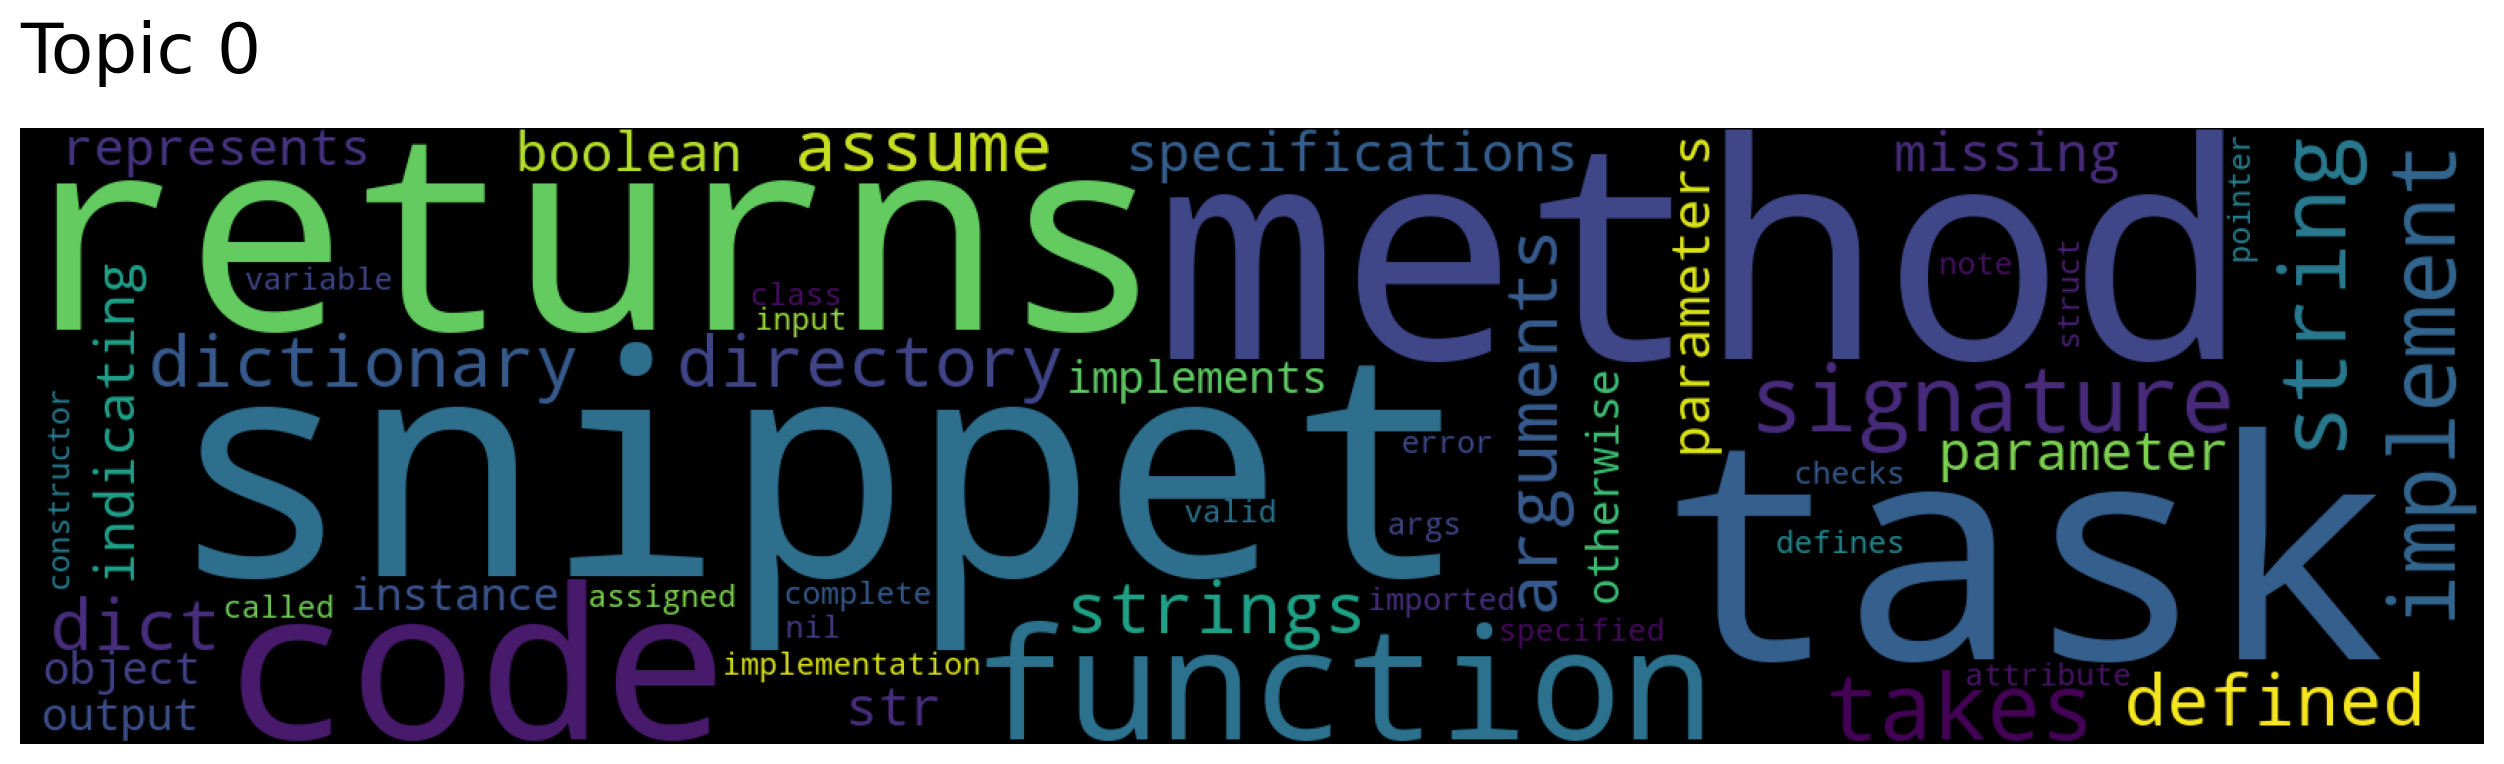

In [34]:
model.generate_topic_wordcloud(0)

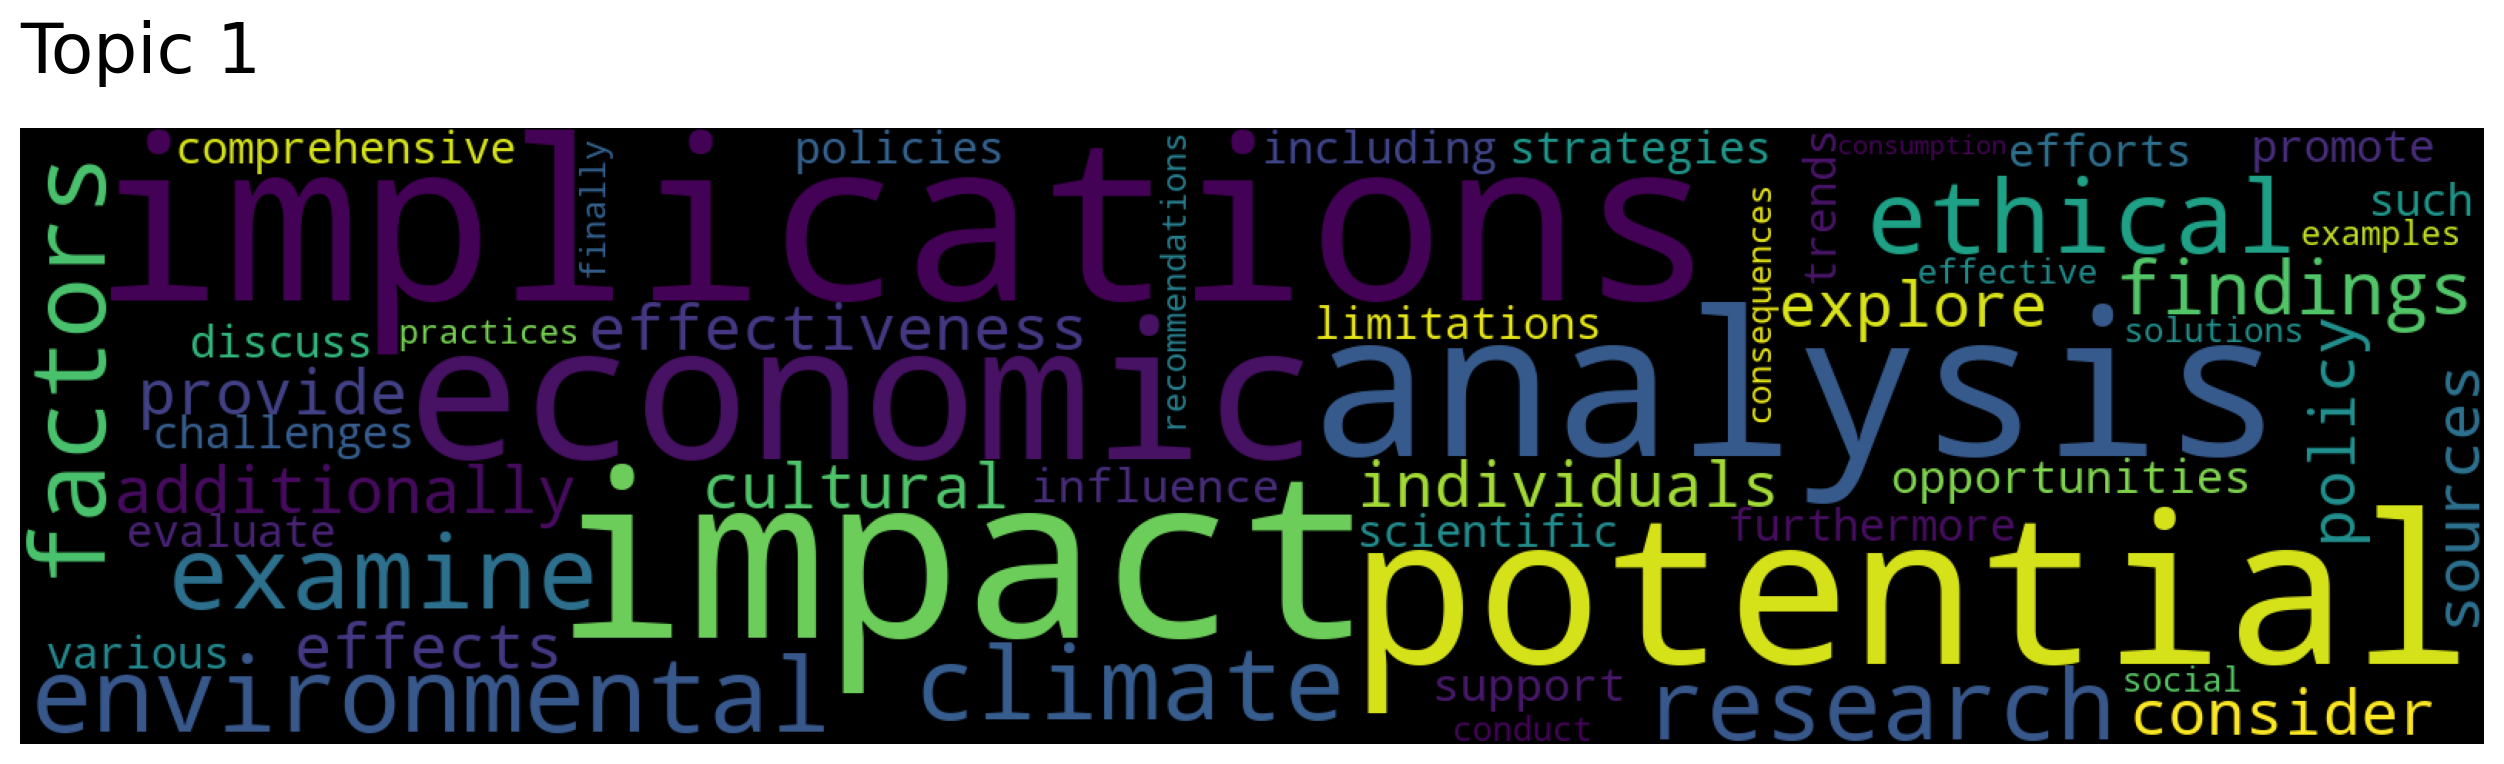

In [24]:
model.generate_topic_wordcloud(1)

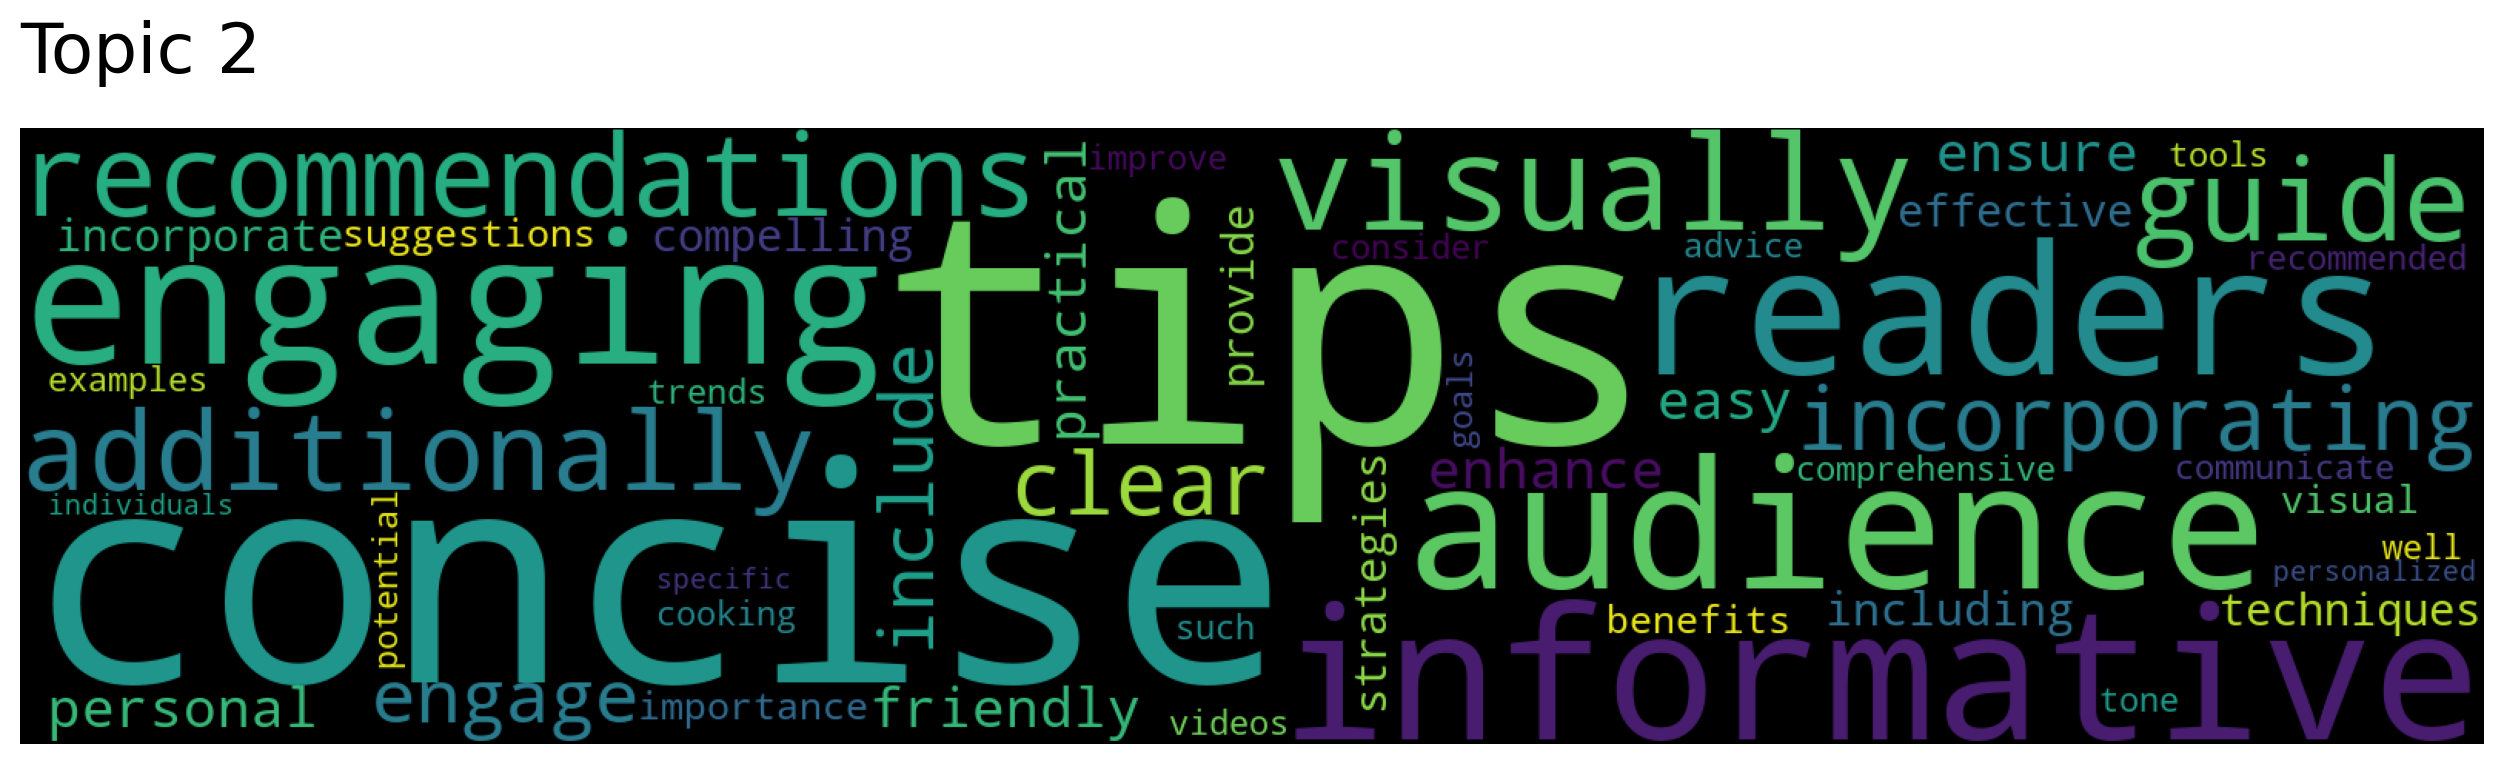

In [25]:
model.generate_topic_wordcloud(2)

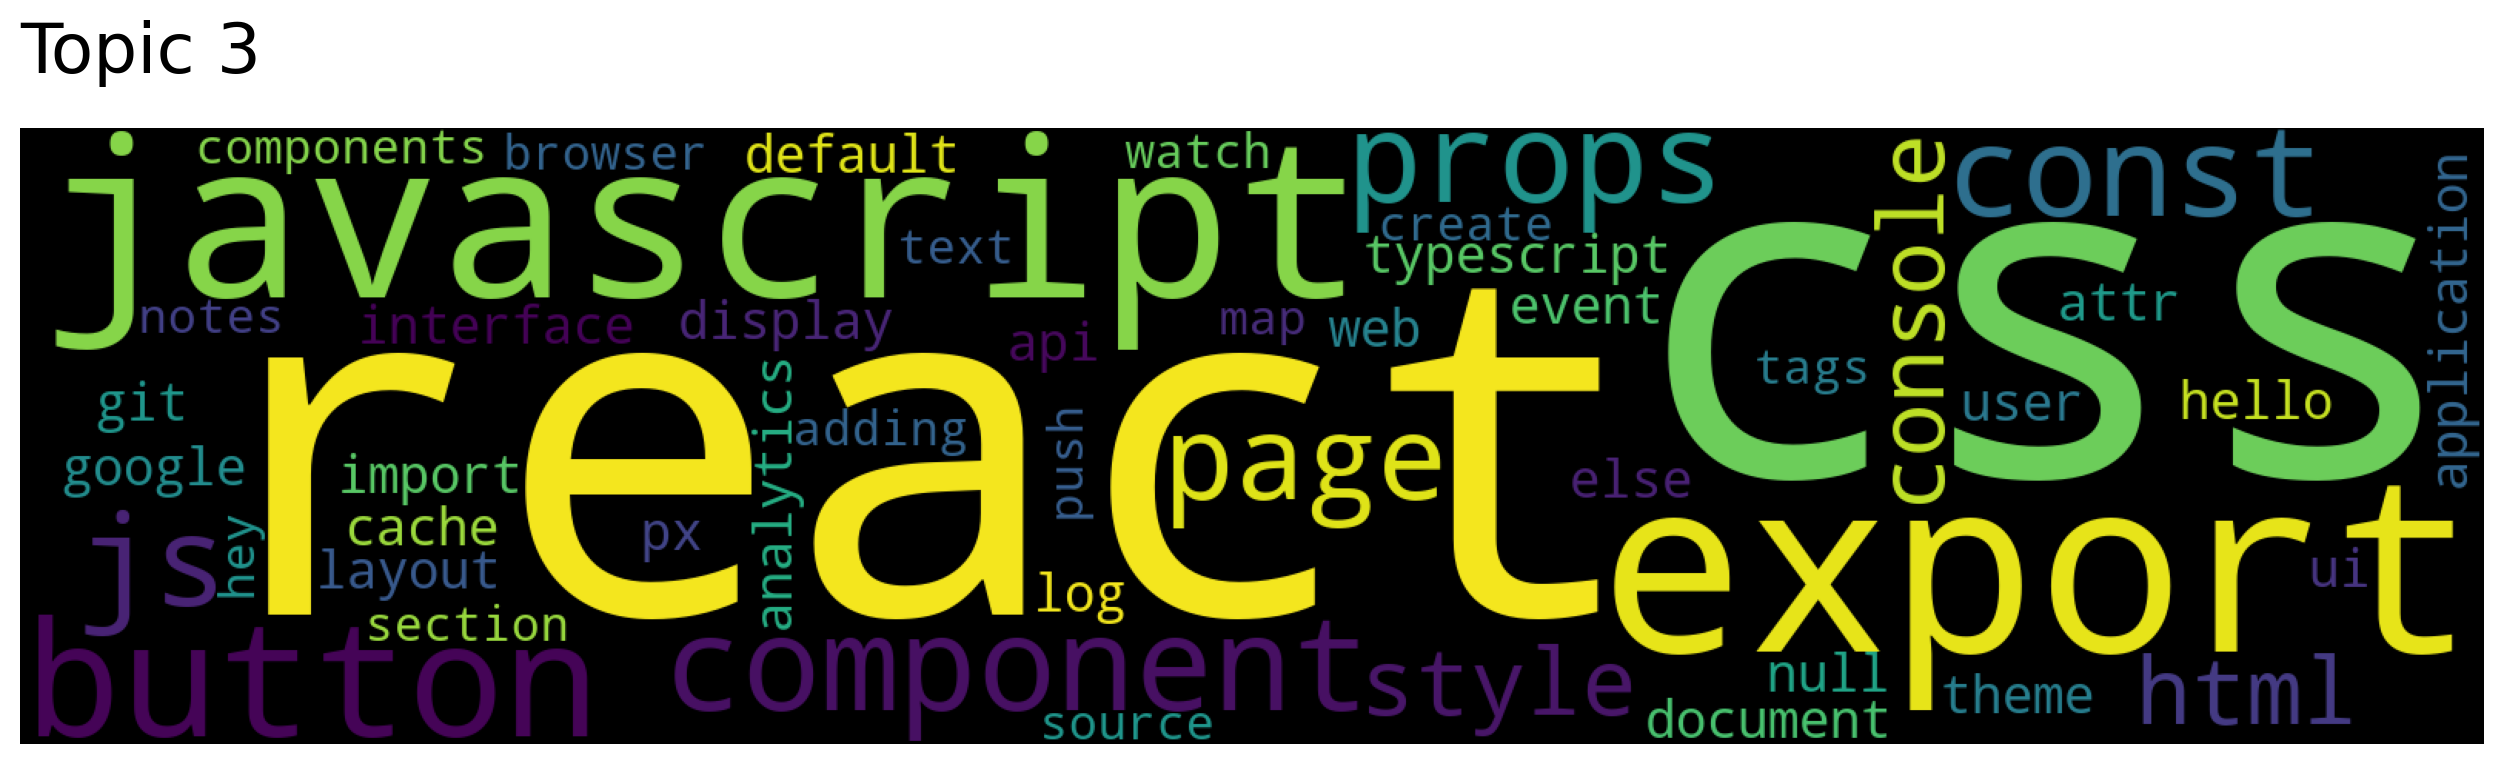

In [26]:
model.generate_topic_wordcloud(3)

Look at documents aligning with a topic

In [38]:
model.search_documents_by_topic(topic_num=3, num_docs=5)

(array(['how to make a website whit react js',
        'convert to react.js hooks\n\nimport React, { useState, useEffect } from "react";\nimport "./index.css";\nimport { Skeleton } from "antd";\n\nconst App: React.FC = () => {\n const [loading, setLoading] = useState(true);\n\n useEffect(() => {\n setTimeout(() => {\n setLoading(false);\n }, 1000);\n }, []);\n return <>{loading ?  : <>};\n};\n\nexport default App;',
        'react popup in gloabl', 'Can you help me with React component?',
        'how do I embed react.js dashboard inside my website'],
       dtype=object),
 array([0.69362   , 0.63872266, 0.620364  , 0.61007035, 0.6081962 ],
       dtype=float32),
 array([5836, 2963, 9210, 7847, 9677]))

Using the wordclouds, model.search_documents_by_topic, model.topic_words

**Give a 2-4 word summary for each of the the top four topics** ⭕

Your answers here: 

Topic 0: Various Code Snippets 

Topic 1: Writing Academic Materials

Topic 2: Instruction of Simple Tasks

Topic 3: React Questions
